# matplotlibとseabornによるデータの可視化

## 可視化のための準備

### import

In [1]:
import numpy as np
import pandas as pd
%precision 3
from matplotlib import pyplot as plt
#グラフをJupyter Notebook内に表示させるための指定
%matplotlib inline

### プロットの保存

In [12]:
plt.savefig("filename")

<Figure size 432x288 with 0 Axes>

## 折れ線グラフ

### pyplotによる折れ線グラフ

In [10]:
x = np.arange(start=0,stop=10,step=1)
y = np.array([2,3,4,3,5,4,6,7,4,8])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0,0.5,'y')

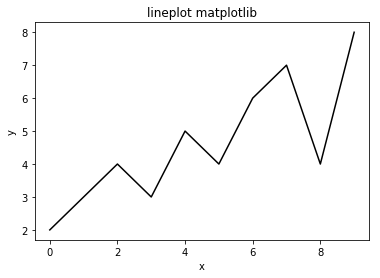

In [11]:
plt.plot(x,y,color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

### seaborn + pyplotによる折れ線グラフ

Text(0,0.5,'y')

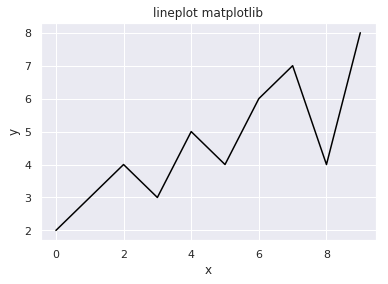

In [16]:
import seaborn as sns
sns.set()
plt.plot(x,y,color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel("x")
plt.ylabel("y")

## ヒストグラム(distplot)

### seabornによるヒストグラム(distplot)

In [17]:
fishdata = np.array([2,3,3,4,4,4,4,5,5,6])
fishdata

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

bins = n : nつの区分に分ける<br>
kde      : カーネル密度推定のon/off

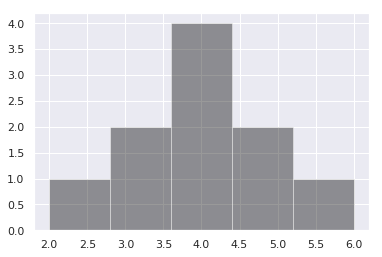

In [18]:
sns.distplot(fishdata,bins = 5,color = 'black',kde = False)

### カーネル密度推定によるヒストグラム平滑化

カーネル密度推定はヒストグラムの持つ問題を解消するために生まれた<br>
つまり区分をどのように設定するかで形状が大きく変わる<br>
カーネル密度推定は、ヒストグラムの平滑化を行うことにより区分を分けzに連続的な線で表現するもの

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


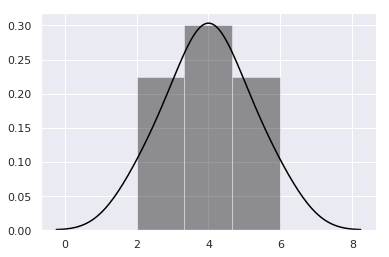

In [20]:
sns.distplot(fishdata,color = 'black')

縦軸の数値がかわったのは、ヒストグラムの面積が１になるようにするため<br>
ヒストグラムの面積を確率的に解釈している<br>
明示的にこの指定をする場合はnorm_hist = True

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


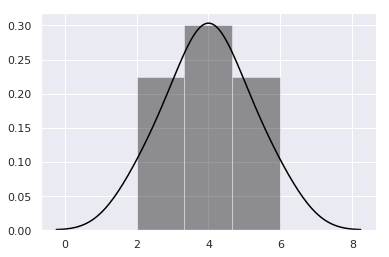

In [21]:
sns.distplot(fishdata,color = 'black',norm_hist = True)

### ２変量データに対するヒストグラム

In [27]:
fishmulti = pd.DataFrame({
    'species' : np.array(["A","A","A","A","A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B"]),
    'length'  : np.array([2,3,3,4,4,4,4,5,5,6,5,6,6,7,7,7,7,8,8,9])
})
print(fishmulti)

   species  length
0        A       2
1        A       3
2        A       3
3        A       4
4        A       4
5        A       4
6        A       4
7        A       5
8        A       5
9        A       6
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


In [28]:
fishmulti.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [31]:
length_a = fishmulti.query('species == "A"')["length"]
length_b = fishmulti.query('species == "B"')["length"]

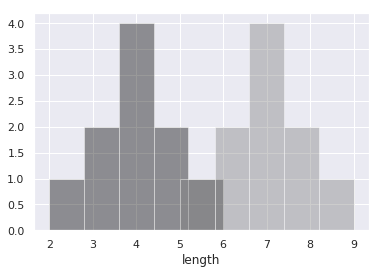

In [32]:
sns.distplot(length_a,bins=5,color = 'black',kde = False)
sns.distplot(length_b,bins=5,color = 'gray',kde = False)

### 多変量データに対するヒストグラム

sns.関数名(<br>
    x = "x軸の列名",<br>
    y = "t軸の列名",<br>
    data = データフレーム,<br>
    その他の引数<br>
)

## 箱ひげ図（boxplot）

種類別の魚の体調など「カテゴリ型の変数×数値型の変数」の組み合わせのデータを図示する場合<br>
箱ひげ図を用いることが多い

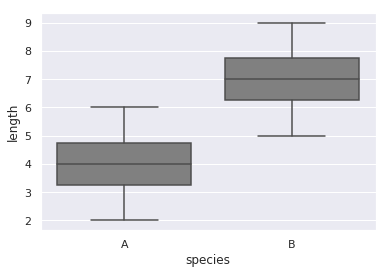

In [35]:
sns.boxplot(x="species",y="length",data=fishmulti,color="gray")

箱の中央線は中央値を示す<br>
箱の上端と下端は四分位点(75%,25%)を示す<br>
ひげはデータの範囲を表している

## バイオリンプロット(violinplot)

箱ひげ図のひげの代わりにカーネル密度推定の結果を用いたもの<br>
比較的新しくできたグラフらしい

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


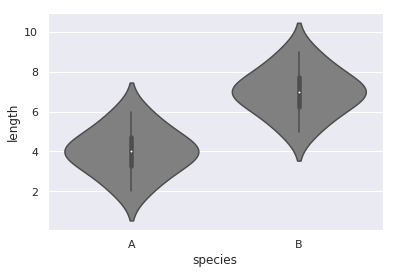

In [36]:
sns.violinplot(x="species",y="length",data=fishmulti,color="gray")

箱の代わりにヒストグラムを横向きにしたもの<br>
どのあたりにデータが集中しているかという情報が付加されている

## 棒グラフ(barplot)

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


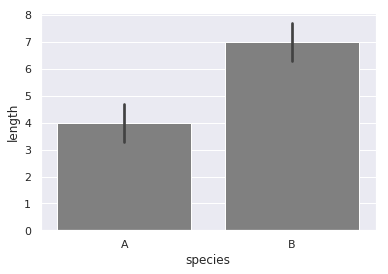

In [37]:
sns.barplot(x="species",y="length",data=fishmulti,color="gray")

棒の高さは平均値を表している<br>
黒い線は$\boldsymbol{エラーバー}$と呼ばれるもので、信頼区間を示している<br>
箱ひげ図に比べて情報量が少なくなってしまうので、適宜使い分けるように。

## 散布図(jointplot)

「数値型の変数×数値型の変数」の組み合わせのグラフに用いる<br>

In [40]:
import scipy as sp
covdata = pd.DataFrame({
    "x" : sp.array([18.5,18.7,19.1,19.7,21.5,21.7,21.8,22.0,23.4,23.8]),
    "y" : sp.array([34,39,41,38,45,41,52,44,44,49])
})
print(covdata)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


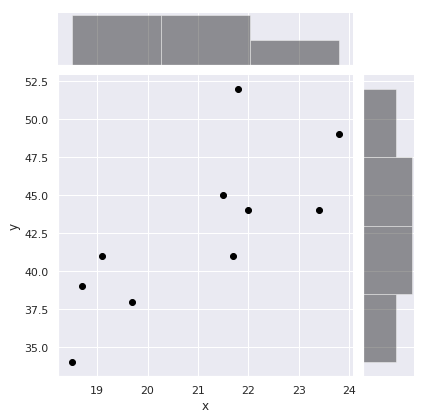

In [45]:
sns.jointplot(x="x",y="y",data=covdata,color="black")

本当はピアソン積率相関関数も出てくるらしいけど出てきてない<br>
ともあれ正の相関係数が得られることから、グラフも右肩上がりの散布図が得られていることがわかる

## ペアプロット(pairplot)

多くの変数を持つデータに対する図示<br>
2つ以上の変数をまとめて図示する場合は,プログラムも少し書き方が変わる<br>

seaborn組み込みのアヤメのデータ

In [46]:
iris = sns.load_dataset("iris")
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


ちなみにsepalはガク,petalは花弁でありその長さや幅を記録したデータ<br>
これを種類別に平均値を求めてみる

In [47]:
iris.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


数値ごとに大きさの違いがあるように見える<br>
こういうのを図示するときに用いる

/home/yu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


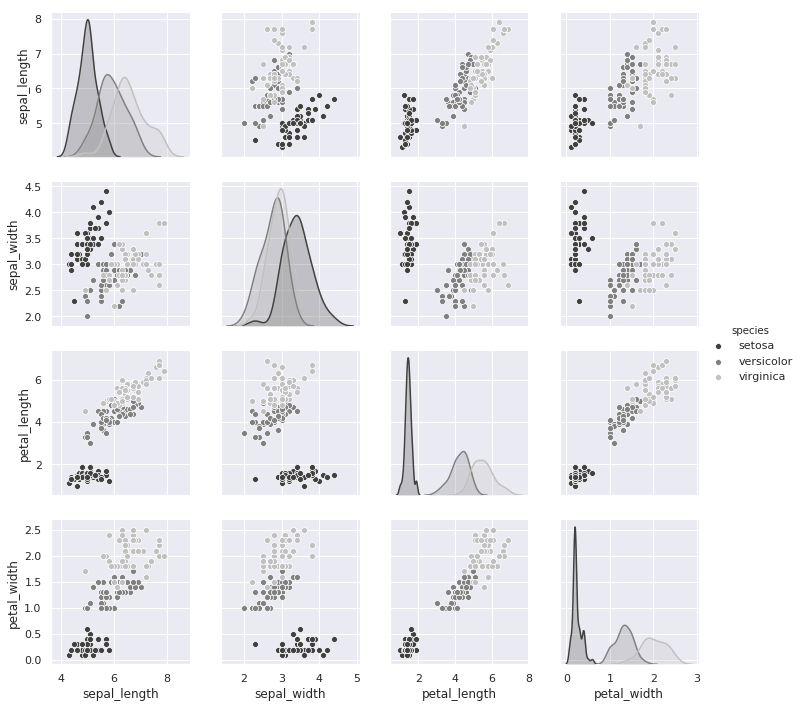

In [48]:
sns.pairplot(iris,hue="species",palette="gray")

pairplot関数はデータフレームのみを指定した場合、散布図を並べて表示する<br>
hue = "カテゴリ変数の列名" を指定した場合、カテゴリ別に色分けしたグラフを描いてくれる<br>
行や列ごとに変数の名前が書かれており、例えば2行1列目の散布図は縦軸がsepal_width,横軸がsepal_lengthの散布図となる<br>
対角線上ではヒストグラムが描かれている